In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import norm

In [2]:
#Vogliamo generare i grafici delle distribuzioni 
#per ogni variabile numerica del dataset

In [3]:
#Importo il dataframe

DF_PATH = Path(r"C:\Users\AlessandroJacopoRavi\OneDrive - ITS Angelo Rizzoli\Desktop\Data Vision Advanced\DataVision_Advanced\DataVisionAdvanced-Exam\data\vgsales_clean.csv")
df = pd.read_csv(DF_PATH)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Selezioniamo le variabili numeriche
num_cols = ["Year_of_Release","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales","Critic_Score","Critic_Count","User_Score","User_Count"]

Adesso creo tutti i grafici necessari per l'esame

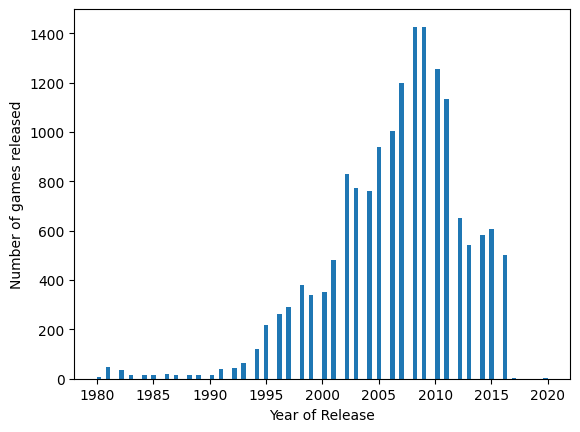

In [6]:
#Numbero di giochi rilasciati per anno

plt.hist(df[num_cols[0]],100)
plt.xlabel("Year of Release")
plt.ylabel("Number of games released")
plt.show()

In [7]:
# Aggrego per Anno il numero di release per Genere
agg_df = df.groupby(["Year_of_Release", "Genre"]).size().reset_index(name="count")

# Plot distribution
fig = px.bar(
    agg_df,
    x="Year_of_Release",
    y="count",
    color="Genre",
    barmode="group",
    title="Games releases per Year by Genre"
)

fig.show()

In [8]:
# Aggrego per Anno il numero di release per Piattaforma
agg_df = df.groupby(["Year_of_Release", "Platform"]).size().reset_index(name="count")

# Plot distribution
fig = px.bar(
    agg_df,
    x="Year_of_Release",
    y="count",
    color="Platform",
    barmode="group",
    title="Games releases per Year by Platform"
)

fig.show()

In [9]:
"""""
Grafico che visualizza le Vendite globali in relazione al Rating,
con colorazione specifica sul Genere per visualizzare meglio il
grafico
"""""

fig = px.bar(
    df,
    x="Rating",          # categorical variable
    y="Global_Sales",   # numerical variable
    title="Total Global Sales per Rating",
    color="Genre",
    barmode="group"
)
fig.show()



In [10]:
"""""
Grafico che mette in relazione i Global_Sales e il
Critic_Score
"""""

fig = px.scatter(
    df,
    x="Critic_Score",
    y="Global_Sales",
    title="Correlation between Critic_Score and Global_Sales"
)
fig.show()

In [11]:
"""""
Grafico che mette in relazione i Global_Sales e il
User_Score
"""""

df["User_Score"] = pd.to_numeric(df["User_Score"], errors="coerce") #Converti User_Score in una variabile numerica

fig = px.scatter(
    df,
    x="User_Score",
    y="Global_Sales",
    title="Correlation between User_Score and Global_Sales"
)
fig.show()

Distribuzione di tutte le Variabili numeriche

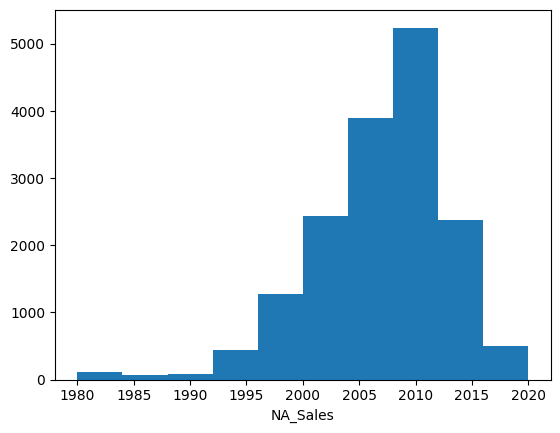

In [12]:
plt.hist(df[num_cols[0]],10)
plt.xlabel(num_cols[1])
plt.show()

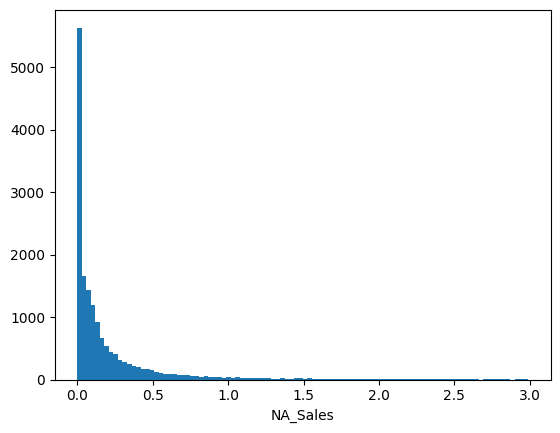

In [ ]:
subset = df[df[num_cols[1]] < 3]   # show only 0–3 range
plt.hist(subset[num_cols[1]], bins=100)
plt.xlabel(num_cols[1])
plt.show()

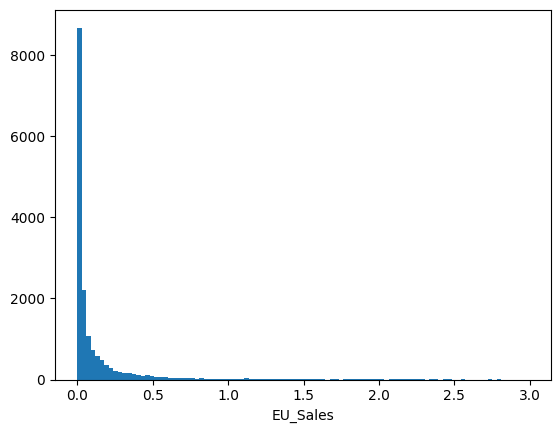

In [16]:
subset = df[df[num_cols[2]] < 3]   # show only 0–3 range
plt.hist(subset[num_cols[2]], bins=100)
plt.xlabel(num_cols[2])
plt.show()

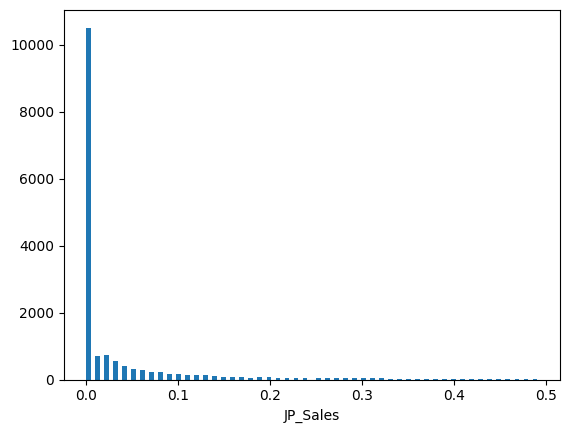

In [19]:
subset = df[df[num_cols[3]] < 0.5]   # show only 0–0.5 range
plt.hist(subset[num_cols[3]], bins=100)
plt.xlabel(num_cols[3])
plt.show()

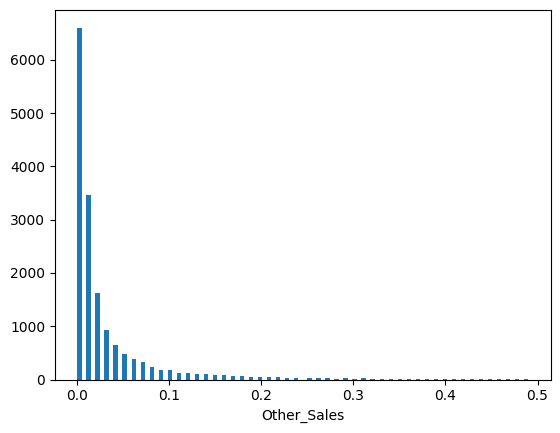

In [22]:
subset = df[df[num_cols[4]] < 0.5]   # show only 0–0.5 range
plt.hist(subset[num_cols[4]], bins=100)
plt.xlabel(num_cols[4])
plt.show()

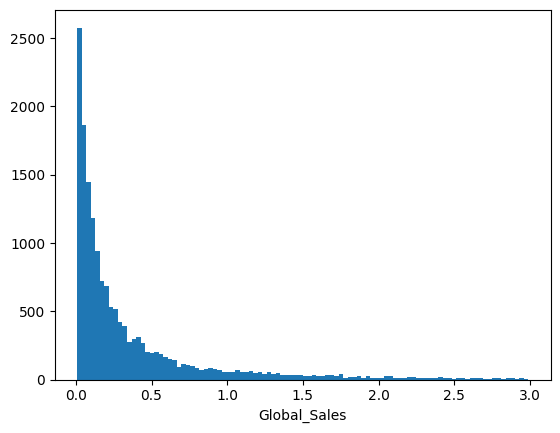

In [23]:
subset = df[df[num_cols[5]] < 3]   # show only 0–3 range
plt.hist(subset[num_cols[5]], bins=100)
plt.xlabel(num_cols[5])
plt.show()

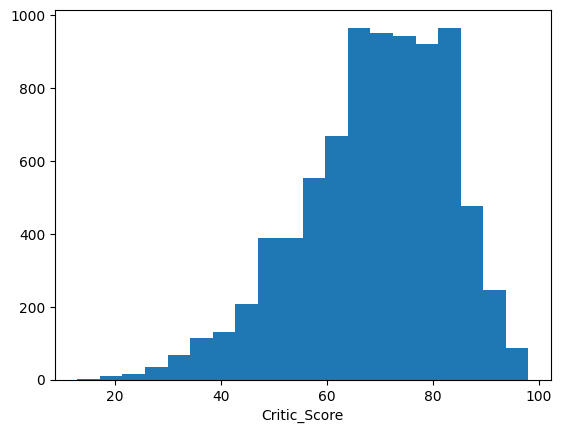

In [17]:
plt.hist(df[num_cols[6]],20)
plt.xlabel(num_cols[6])
plt.show()

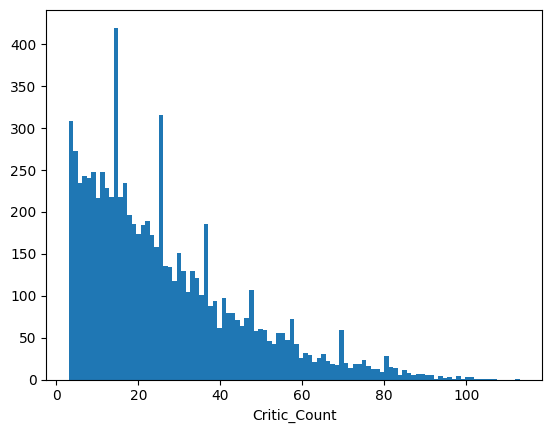

In [18]:
plt.hist(df[num_cols[7]],100)
plt.xlabel(num_cols[7])
plt.show()

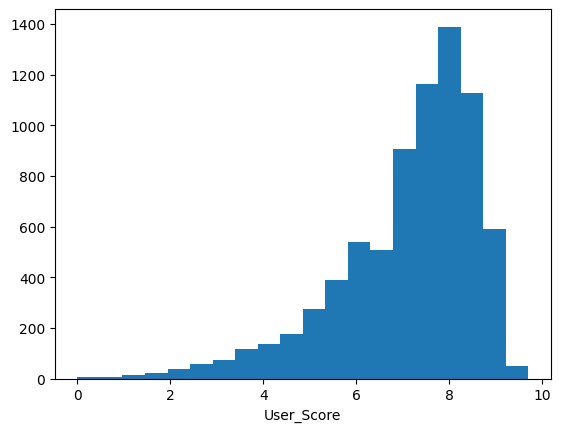

In [19]:
plt.hist(df[num_cols[8]],20)
plt.xlabel(num_cols[8])
plt.show()

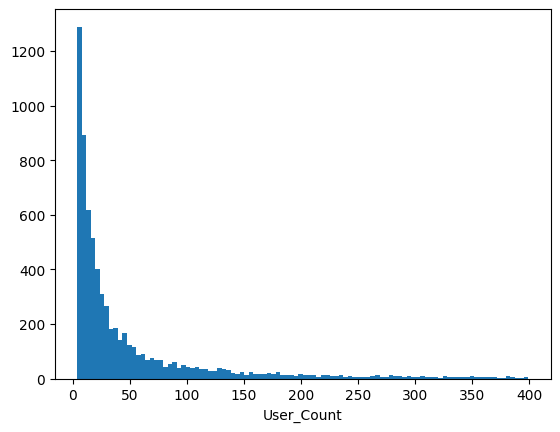

In [27]:
subset = df[df[num_cols[9]] < 400]   # show only 0–400 range
plt.hist(subset[num_cols[9]], bins=100)
plt.xlabel(num_cols[9])
plt.show()